#### Introduction 
[Jupyter](http://jupyter.org/) has a beautiful notebook that lets you write and execute code, analyze data, embed content, and share reproducible work. Jupyter Notebook (previously referred to as IPython Notebook) allows you to easily share your code, data, plots, and explanation in a sinle notebook. Publishing is flexible: PDF, HTML, ipynb, dashboards, slides, and more. Code cells are based on an input and output format. For example:

In [10]:
print "hello world"  

hello world


#### Installation 
There are a few ways to use a Jupyter Notebook:

* Install with [```pip```](https://pypi.python.org/pypi/pip). Open a terminal and type: ```$ pip install jupyter```.
* Windows users can install with [```setuptools```](http://ipython.org/ipython-doc/2/install/install.html#windows). 
* [Anaconda](https://store.continuum.io/cshop/anaconda/) and [Enthought](https://store.enthought.com/downloads/#default) allow you to download a desktop version of Jupyter Notebook.
* [nteract](https://nteract.io/) allows users to work in a notebook enviornment via a desktop application. 
* [Microsoft Azure](https://notebooks.azure.com/) provides hosted access to Jupyter Notebooks. 
* [Domino Data Lab](http://support.dominodatalab.com/hc/en-us/articles/204856585-Jupyter-Notebooks) offers web-based Notebooks.
* [tmpnb](https://github.com/jupyter/tmpnb) launches a temporary online Notebook for individual users. 

#### Getting Started
Once you've installed the Notebook, you start from your terminal by calling ```$ jupyter notebook```. This will open a browser on a [localhost](https://en.wikipedia.org/wiki/Localhost) to the URL of your Notebooks, by default http://127.0.0.1:8888. Windows users need to open up their Command Prompt. You'll see a dashboard with all your Notebooks. You can launch your Notebooks from there. The Notebook has the advantage of looking the same when you're coding and publishing. You just have all the options to move code, run cells, change kernels, and [use Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) when you're running a NB.

#### Helpful Commands
**- Tab Completion:** Jupyter supports tab completion! You can type ```object_name.<TAB>``` to view an object’s attributes. For tips on cell magics, running Notebooks, and exploring objects, check out the [Jupyter docs](https://ipython.org/ipython-doc/dev/interactive/tutorial.html#introducing-ipython).
<br>**- Help:** provides an introduction and overview of features.

In [11]:
help

Type help() for interactive help, or help(object) for help about object.

**- Quick Reference:** open quick reference by running:

In [12]:
quickref

**- Keyboard Shortcuts:** ```Shift-Enter``` will run a cell, ```Ctrl-Enter``` will run a cell in-place, ```Alt-Enter``` will run a cell and insert another below. See more shortcuts [here](https://ipython.org/ipython-doc/1/interactive/notebook.html#keyboard-shortcuts).

#### Languages 
The bulk of this tutorial discusses executing python code in Jupyter notebooks. You can also use Jupyter notebooks to execute R code. Skip down to the [R section] for more information on using IRkernel with Jupyter notebooks and graphing examples.
#### Package Management
When installing packages in Jupyter, you either need to install the package in your actual shell, or run the ```!``` prefix, e.g.:

    !pip install packagename
    
You may want to [reload submodules](http://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython) if you've edited the code in one. IPython comes with automatic reloading magic. You can reload all changed modules before executing a new line. 

    %load_ext autoreload
    %autoreload 2

Some useful packages that we'll use in this tutorial include:
* [Pandas](https://plot.ly/pandas/): import data via a url and create a dataframe to easily handle data for analysis and graphing. See examples of using Pandas here: https://plot.ly/pandas/.
* [NumPy](https://plot.ly/numpy/): a package for scientific computing with tools for algebra, random number generation, integrating with databases, and managing data. See examples of using NumPy here: https://plot.ly/numpy/.
* [SciPy](http://www.scipy.org/): a Python-based ecosystem of packages for math, science, and engineering.
* [Plotly](https://plot.ly/python/getting-started): a graphing library for making interactive, publication-quality graphs. See examples of statistic, scientific, 3D charts, and more here: https://plot.ly/python.

In [13]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py

#### Import Data
You can use pandas `read_csv()` function to import data. In the example below, we import a csv [hosted on github](https://github.com/plotly/datasets/) and display it in a [table using Plotly](https://plot.ly/python/table/):  

In [14]:
import plotly.plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
py.iplot(table, filename='jupyter-table1')

Use `dataframe.column_title` to index the dataframe:

In [15]:
schools = df.School
schools[0]

'MIT'

Most pandas functions also work on an entire dataframe. For example, calling ```std()``` calculates the standard deviation for each column.

In [16]:
df.std()

Women    12.813683
Men      25.705289
Gap      14.137084
dtype: float64

#### Plotting Inline
You can use [Plotly's python API](https://plot.ly/python) to plot inside your Jupyter Notebook by calling ```plotly.plotly.iplot()``` or ```plotly.offline.iplot()``` if working offline. Plotting in the notebook gives you the advantage of keeping your data analysis and plots in one place. Now we can do a bit of interactive plotting. Head to the [Plotly getting started](https://plot.ly/python/) page to learn how to set your credentials. Calling the plot with ```iplot``` automaticallly generates an interactive version of the plot inside the Notebook in an iframe. See below:

In [17]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(x=df.School,
            y=df.Gap)]

py.iplot(data, filename='jupyter-basic_bar')

Plotting multiple traces and styling the chart with custom colors and titles is simple with Plotly syntax. Additionally, you can control the privacy with [```sharing```](https://plot.ly/python/privacy/) set to ```public```, ```private```, or ```secret```.

In [19]:
import plotly.plotly as py
import plotly.graph_objs as go

trace_women = go.Bar(x=df.School,
                  y=df.Women,
                  name='Women',
                  marker=dict(color='#ffcdd2'))

trace_men = go.Bar(x=df.School,
                y=df.Men,
                name='Men',
                marker=dict(color='#A2D5F2'))

trace_gap = go.Bar(x=df.School,
                y=df.Gap,
                name='Gap',
                marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]

layout = go.Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, sharing='private', filename='jupyter-styled_bar')

Now we have interactive charts displayed in our notebook. Hover on the chart to see the values for each bar, click and drag to zoom into a specific section or click on the legend to hide/show a trace. 

#### Plotting Interactive Maps
Plotly is now integrated with [Mapbox](https://www.mapbox.com/). In this example we'll plot lattitude and longitude data of nuclear waste sites. To plot on Mapbox maps with Plotly you'll need a Mapbox account and a [Mapbox Access Token](https://www.mapbox.com/studio/signin/) which you can add to your [Plotly settings]().

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

# mapbox_access_token = 'ADD YOUR TOKEN HERE'

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Nuclear%20Waste%20Sites%20on%20American%20Campuses.csv')
site_lat = df.lat
site_lon = df.lon
locations_name = df.text

data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        hoverinfo='none'
    )]

        
layout = go.Layout(
    title='Nuclear Waste Sites on Campus',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='jupyter-Nuclear Waste Sites on American Campuses')

#### 3D Plotting
Using Numpy and Plotly, we can make interactive [3D plots](https://plot.ly/python/#3d) in the Notebook as well.

In [22]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

s = np.linspace(0, 2 * np.pi, 240)
t = np.linspace(0, np.pi, 240)
tGrid, sGrid = np.meshgrid(s, t)

r = 2 + np.sin(7 * sGrid + 5 * tGrid)  # r = 2 + sin(7s+5t)
x = r * np.cos(sGrid) * np.sin(tGrid)  # x = r*cos(s)*sin(t)
y = r * np.sin(sGrid) * np.sin(tGrid)  # y = r*sin(s)*sin(t)
z = r * np.cos(tGrid)                  # z = r*cos(t)

surface = go.Surface(x=x, y=y, z=z)
data = [surface]

layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='jupyter-parametric_plot')

#### Animated Plots
Checkout Plotly's [animation documentation](https://plot.ly/python/#animations) to see how to create animated plots inline in Jupyter notebooks like the Gapminder plot displayed below:
![https://plot.ly/~PythonPlotBot/231/](https://raw.githubusercontent.com/cldougl/plot_images/add_r_img/anim.gif)

#### Plot Controls & IPython widgets
Add sliders, buttons, and dropdowns to your inline chart: 

In [23]:
import plotly.plotly as py
import numpy as np

data = [dict(
        visible = False,
        line=dict(color='00CED1', width=6),
        name = '𝜈 = '+str(step),
        x = np.arange(0,10,0.01),
        y = np.sin(step*np.arange(0,10,0.01))) for step in np.arange(0,5,0.1)]
data[10]['visible'] = True

steps = []
for i in range(len(data)):
    step = dict(
        method = 'restyle',
        args = ['visible', [False] * len(data)],
    )
    step['args'][1][i] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 10,
    currentvalue = {"prefix": "Frequency: "},
    pad = {"t": 50},
    steps = steps
)]

layout = dict(sliders=sliders)
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Sine Wave Slider')

Additionally, [IPython widgets](http://moderndata.plot.ly/widgets-in-ipython-notebook-and-plotly/) allow you to add sliders, widgets, search boxes, and more to your Notebook. See the [widget docs](https://ipython.org/ipython-doc/3/api/generated/IPython.html.widgets.interaction.html) for more information. For others to be able to access your work, they'll need IPython. Or, you can use a cloud-based NB option so others can run your work.
<br>
<img src="http://moderndata.plot.ly/wp-content/uploads/2015/01/best_gif_ever.gif"/>

#### Executing R Code
IRkernel, an R kernel for Jupyter, allows you to write and execute R code in a Jupyter notebook. Checkout the [IRkernel documentation](https://irkernel.github.io/installation/) for some simple installation instructions. Once IRkernel is installed, open a Jupyter Notebook by calling `$ jupyter notebook` and use the New dropdown to select an R notebook.

![](https://raw.githubusercontent.com/cldougl/plot_images/add_r_img/rkernel.png)

See a full R example Jupyter Notebook here: https://plot.ly/~chelsea_lyn/14069 

#### Additional Embed Features
We've seen how to embed Plotly tables and charts as iframes in the notebook, with `IPython.display` we can embed additional features, such a videos. For example, from YouTube:

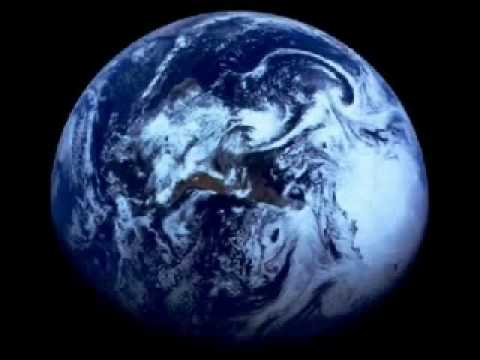

In [24]:
from IPython.display import YouTubeVideo
YouTubeVideo("wupToqz1e2g")

#### LaTeX
We can embed LaTeX inside a Notebook by putting a ```$$``` around our math, then run the cell as a Markdown cell. For example, the cell below is ```$$c = \sqrt{a^2 + b^2}$$```, but the Notebook renders the expression.

$$c = \sqrt{a^2 + b^2}$$

Or, you can display output from Python, as seen [here](http://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook).

In [25]:
from IPython.display import display, Math, Latex

display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>

#### Exporting & Publishing Notebooks
We can export the Notebook as an HTML, PDF, .py, .ipynb, Markdown, and reST file. You can also turn your NB [into a slideshow](http://ipython.org/ipython-doc/2/notebook/nbconvert.html). You can publish Jupyter Notebooks on Plotly. Simply visit [plot.ly](https://plot.ly/organize/home?create=notebook) and select the `+ Create` button in the upper right hand corner. Select Notebook and upload your Jupyter notebook (.ipynb) file!
The notebooks that you upload will be stored in your [Plotly organize folder](https://plot.ly/organize) and hosted at a unique link to make sharing quick and easy.
See some example notebooks:
- https://plot.ly/~chelsea_lyn/14066
- https://plot.ly/~notebook_demo/35
- https://plot.ly/~notebook_demo/85
- https://plot.ly/~notebook_demo/128

#### Publishing Dashboards
Users publishing interactive graphs can also use [Plotly's dashboarding tool](https://plot.ly/dashboard/create) to arrange plots with a drag and drop interface. These dashboards can be published, embedded, and shared. <img src="http://i.imgur.com/hz0eNpH.png" />

### Publishing Dash Apps
For users looking to ship and productionize Python apps, [dash](https://github.com/plotly/dash) is an assemblage of Flask, Socketio, Jinja, Plotly and boiler plate CSS and JS for easily creating data visualization web-apps with your Python data analysis backend.
<br>
<img src="https://camo.githubusercontent.com/a38f9ed71170e3112dd3e4af1d11d4b081fe2e25/687474703a2f2f692e696d6775722e636f6d2f643379346e776d2e676966"/>
<br>

### Jupyter Gallery
For more Jupyter tutorials, checkout [Plotly's python documentation](https://plot.ly/python/): all documentation is written in jupyter notebooks that you can download and run yourself or checkout these [user submitted examples](https://plot.ly/ipython-notebooks/)! 

[![IPython Notebook Gallery](http://i.imgur.com/AdElJQx.png)](https://plot.ly/ipython-notebooks/)

In [1]:
from IPython.display import display, HTML

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="http://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

!pip install git+https://github.com/plotly/publisher.git --upgrade
import publisher
publisher.publish(
    'jupyter_tutorial.ipynb', 'python/ipython-notebook-tutorial/', 'Jupyter Notebook Tutorial',
    'Jupyter notebook tutorial on how to install, run, and use Jupyter for interactive matplotlib plotting, data analysis, and publishing code',
    title = 'Jupyter Notebook Tutorial | plotly',
    name = 'Jupyter Notebook Tutorial',
    thumbnail='thumbnail/ipythonnb.jpg', language='python',
    page_type='example_index', has_thumbnail='true', display_as='chart_studio', order=11,
    ipynb='~chelsea_lyn/14070') 

  Cloning https://github.com/plotly/publisher.git to c:\users\brand\appdata\local\temp\pip-req-build-f94f3d84
  Found existing installation: publisher 0.11
    Uninstalling publisher-0.11:
      Successfully uninstalled publisher-0.11
  Running setup.py install for publisher: started
    Running setup.py install for publisher: finished with status 'done'


C:\Python27\lib\site-packages\IPython\nbconvert.py:13: ShimWarning: The `IPython.nbconvert` package has been deprecated since IPython 4.0. You should import from nbconvert instead.
  "You should import from nbconvert instead.", ShimWarning)
C:\Python27\lib\site-packages\publisher\publisher.py:53: UserWarning: Did you "Save" this notebook before running this command? Remember to save, always save.
  warnings.warn('Did you "Save" this notebook before running this command? '
